In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
tf.__version__
keras.__version__

'2.8.0'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


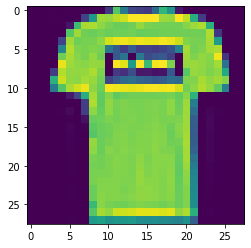

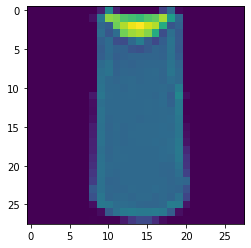

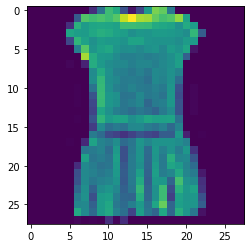

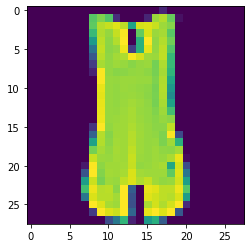

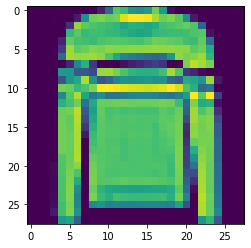

In [ ]:
for i in range(1,6):
  img = X_train_full[i]
  fig = plt.figure
  plt.imshow(img)
  plt.show()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full = X_train_full.reshape(60000, 784) / 255.0
X_test = X_test.reshape(10000, 784) / 255.0

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
input_ = keras.layers.Input(shape=(784,))
hide1 = keras.layers.Dense(300, activation="relu")(input_)
hide2 = keras.layers.Dense(200, activation="relu")(hide1)
concat = keras.layers.Concatenate()([input_, hide2])
batchNorm = keras.layers.BatchNormalization()(concat)
dropout = keras.layers.Dropout(rate=0.5)(batchNorm)
output = keras.layers.Dense(10, activation="softmax")(dropout)
model = keras.Model(inputs=[input_], outputs=[output])

In [ ]:
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model_data = model.fit(X_train_full, y_train_full, epochs=10, validation_split=0.1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 300)          235500      ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 200)          60200       ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 984)          0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [ ]:
mse_test = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8712
